# Drills in Classification
Without practice, you cannot claim that you know things and these drills here are there to enable this option for you. Are you ready to classify some very interesting data? 


## Exercise 1
* **Dataset:** `Iris`
* **Model to use:** [`KNN`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* **Model evaluation:** try the [classification report](https://muthu.co/understanding-the-classification-report-in-sklearn/)

The Iris dataset includes three iris species with 50 samples each as well as some properties about each flower. One flower species (virginica) is linearly separable from the other two, but the other two are not linearly separable from each other. 

You can load the dataset with `scikit-learn` by using: 

```python
sklearn.datasets.load_iris()
```

Your mission it to apply KNN to this dataset and find the best K.

You will quickly understand that you can't evaluate a complexe classification model just with a percentage of accuracy. 

To understand how accurate your model is and, more importantly, where it is wrong, use scikit learn's [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

To use it properly, you will need to understand what the following terms are:
* `Recall`
* `Precision`
* `F1-score`
* `Support`

You can make your own research or [read this article](https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/).

Note_yuri:  
Iris data visualization and KNN classification  
https://www.kaggle.com/code/skalskip/iris-data-visualization-and-knn-classification/notebook

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter


In [2]:
# Load you dataset
# import iris dataset
iris = datasets.load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
# Create a dataFrame
# np.c_ is the numpy concatenate function
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                      columns= iris['feature_names'] + ['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
iris_df[iris_df['target'] == 0].head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


The Iris Flower Dataset involves predicting the flower species given measurements of iris flowers.

In [8]:
iris_df.shape

(150, 5)

In [9]:
iris_df.target.value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

In [10]:
#iris_df['sepal length (cm)'].value_counts()
# continuous variable

In [11]:
# Explore the dataset to understand it. (use pandas and your data visualation's favorite library)
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [12]:
# Preprocess the data (deal with NaNs, deal with text features,...)
print(iris_df.isnull().sum())


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [13]:
# Firstly we need to split data into two arrays: X (features) and y (labels)
X = iris_df.iloc[:, 0:4].values  # features
y = iris_df.iloc[:, 4].values

#Alternative way of selecting features and labels arrays:
#feature_columns = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']
#X = iris_df[feature_columns].values
#y = iris_df['target'].values

In [40]:
y.shape

(150,)

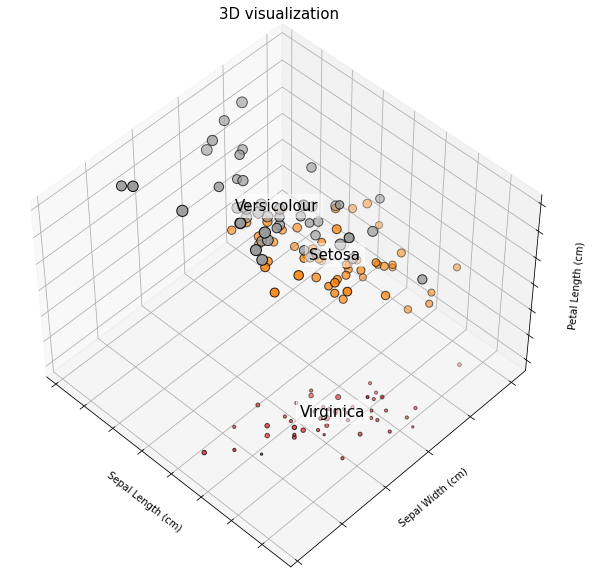

In [14]:
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure(1, figsize=(20, 15))
#ax = Axes3D(fig, elev=48, azim=134)

figura = plt.figure(1, figsize=(15,10))   # 1 : a unique identifier for the figure
ax = plt.subplot(111, projection="3d", elev=48, azim=134)

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=15)

ax.set_title("3D visualization", fontsize=15)
ax.set_xlabel("Sepal Length (cm)", fontsize=10)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width (cm)", fontsize=10)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length (cm)", fontsize=10)
ax.w_zaxis.set_ticklabels([])

plt.show()

## Use a KNN model

Let's split dataset into training set and test set, to check later on whether or not our classifier works correctly.

In [15]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [16]:
len(X_train)   # 80 % 

120

In [17]:
len(X_test)   # 20 % 

30

In [18]:
# Use a KNN model

# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [19]:
#y_pred

In [20]:
classifier.score(X_test, y_test)

0.9666666666666667

In [21]:
# Evaluate your model

# Building confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

In [22]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 96.67 %.


In [23]:

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



https://gist.github.com/purva91/eb395920be650c018d513dcf35d9db99#file-10_roc_curve-py


https://stackoverflow.com/questions/52910061/implementing-roc-curves-for-k-nn-machine-learning-algorithm-using-python-and-sci

In [24]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = classifier.predict_proba(X_test)[:,1]
fprate, tprate, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)   #post_label =1

In [25]:
from sklearn.metrics import auc
roc_auc = auc(fprate, tprate)

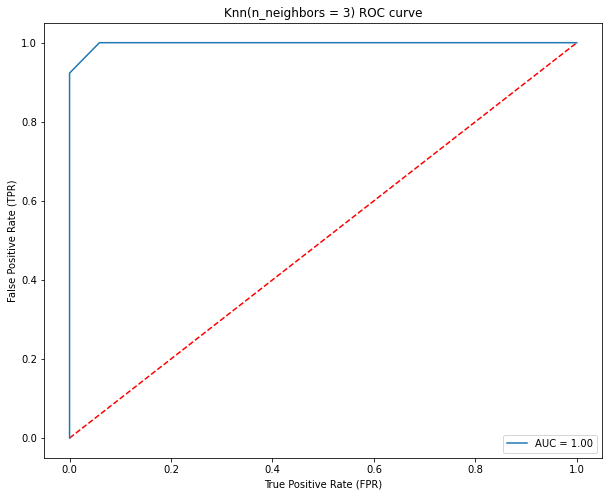

In [26]:
plt.figure(figsize = (10,8))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fprate, tprate, label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlabel('True Positive Rate (FPR)')
plt.ylabel('False Positive Rate (TPR)')
plt.title('Knn(n_neighbors = 3) ROC curve')
plt.show()

It is missing to calculate The optimal number of neighbors, check:  

https://www.kaggle.com/code/skalskip/iris-data-visualization-and-knn-classification/notebook

In [27]:
#Using cross-validation for parameter tuning:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 432x288 with 0 Axes>

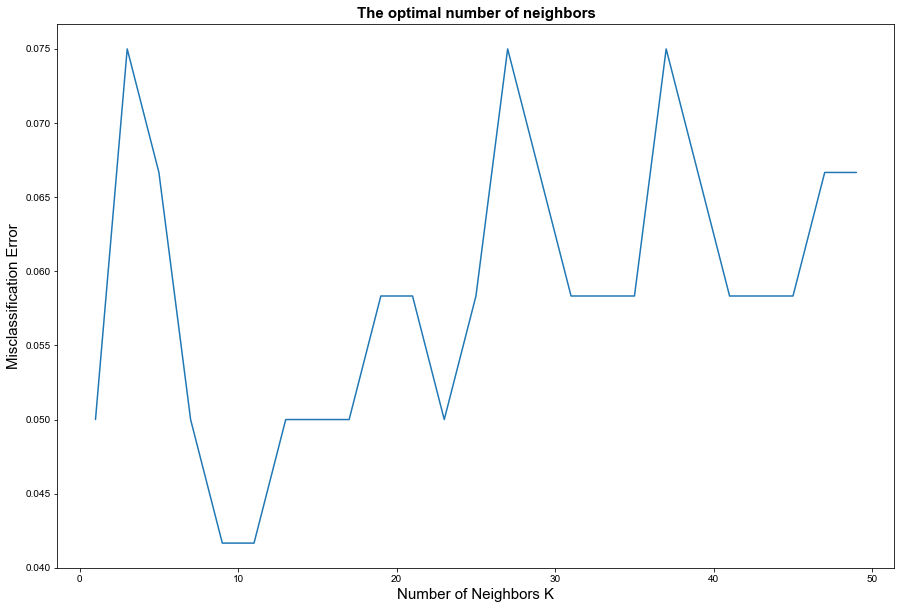

In [28]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=15, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [29]:
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 9.


In [30]:
# Use a KNN model k = 9

# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 9)
classifier = KNeighborsClassifier(n_neighbors=9)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [31]:
classifier.score(X_test, y_test)

1.0

In [32]:
# Evaluate your model

# Building confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [33]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 100.0 %.


In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Elbow Method**

[Elbow Method in Supervised Machine Learning(Optimal K Value)](https://medium.com/@moussadoumbia_90919/elbow-method-in-supervised-learning-optimal-k-value-99d425f229e7)

Nota_yuri: No estimo el mejor k

In [35]:
# loop that trains various KNN models with different k values, then keep track of
#  the error_rate for each of these models with a list
error_rate = []
# Will take some time
for i in range(1,40):
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

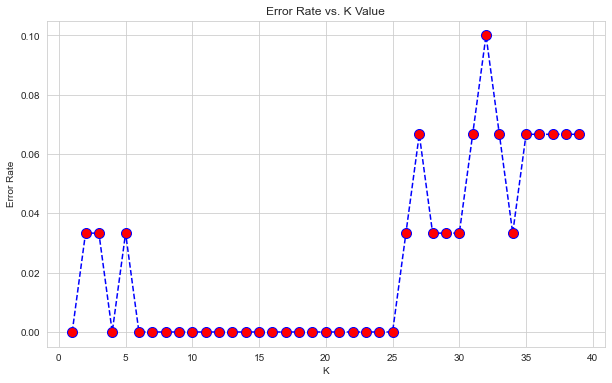

In [36]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [37]:
# finding best k
best_k = k_list[error_rate.index(min(error_rate))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 1.


Resources:  
  
[Precision vs. Recall – An Intuitive Guide for Every Machine Learning Person](https://www.analyticsvidhya.com/blog/2020/09/precision-recall-machine-learning/)